Visualizing Attention for Note 1:


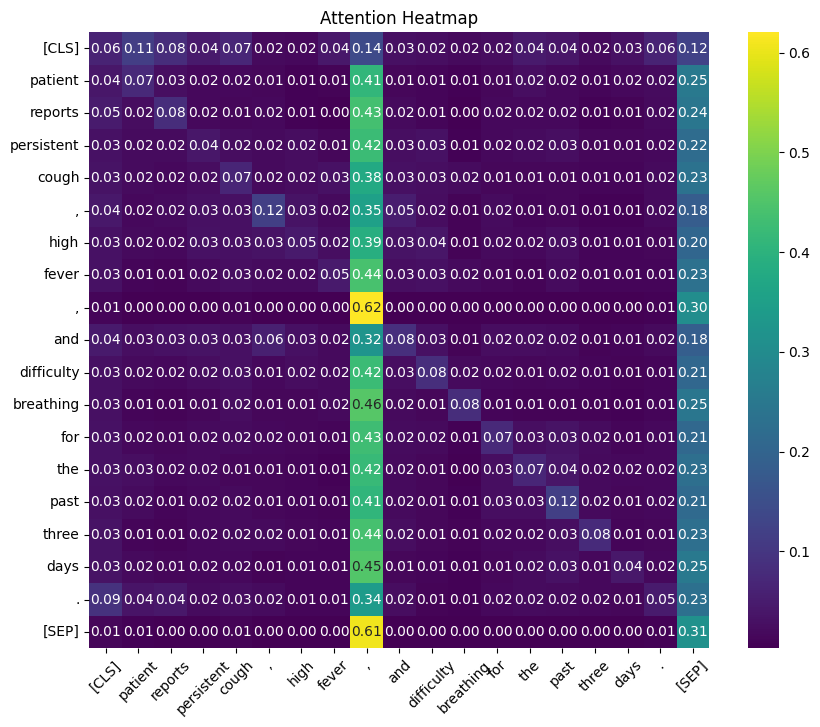

Visualizing Attention for Note 2:


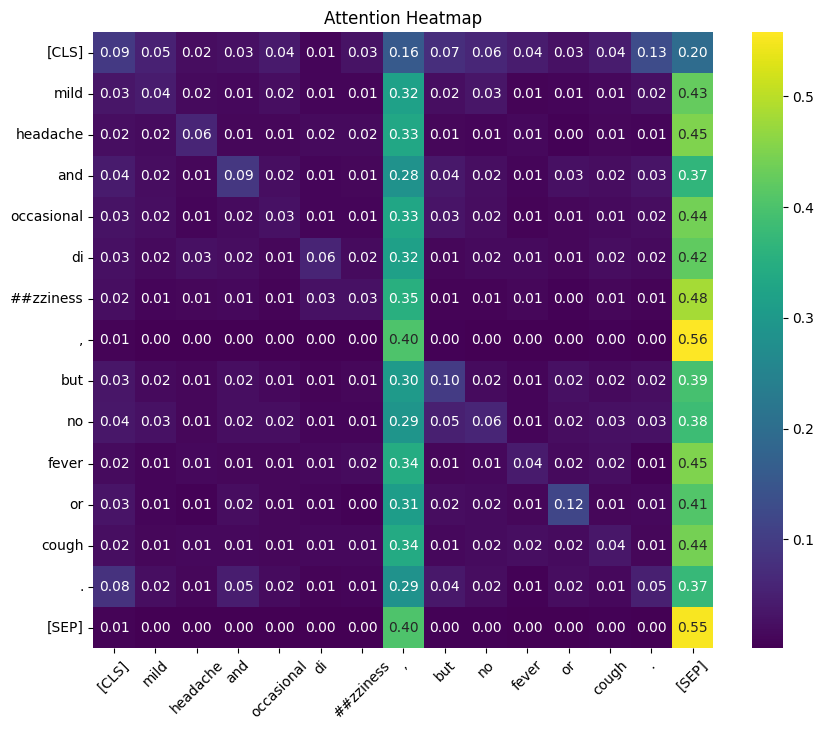

Visualizing Attention for Note 3:


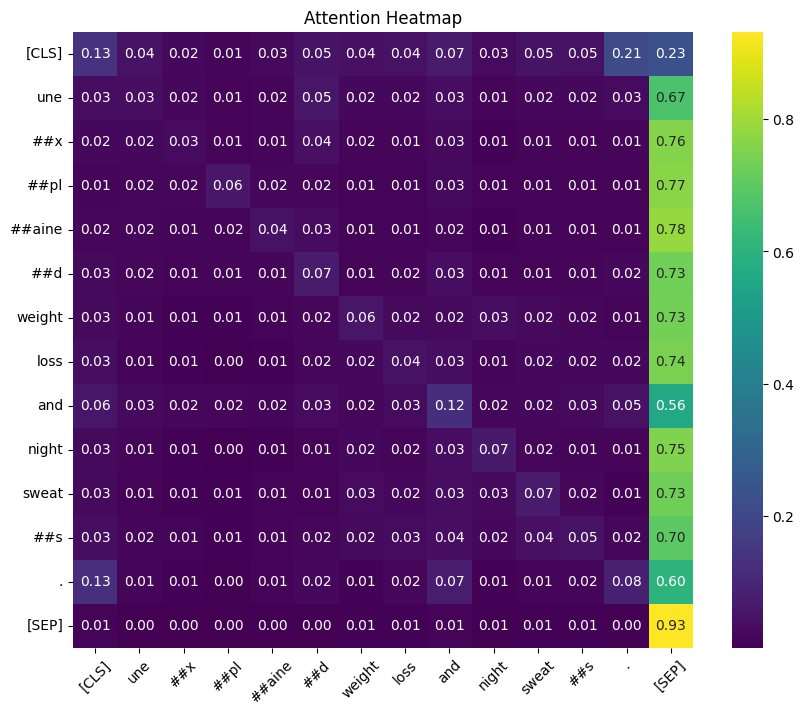

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import BertTokenizer, BertModel
import seaborn as sns
import matplotlib.pyplot as plt

class SymptomAttentionModel(nn.Module):
    def __init__(self):
        super(SymptomAttentionModel, self).__init__()
        self.bert = BertModel.from_pretrained("bert-base-uncased", output_attentions=True)
        self.classifier = nn.Linear(self.bert.config.hidden_size, 1)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        attentions = outputs.attentions  # Access attention weights
        logits = self.classifier(outputs.last_hidden_state[:, 0, :])
        return logits, attentions


def visualize_attention(attention_weights, tokenizer, input_text):
    tokens = tokenizer.tokenize(tokenizer.decode(tokenizer.encode(input_text)))
    attention_map = attention_weights[-1].mean(dim=1).squeeze().detach().cpu().numpy()

    plt.figure(figsize=(10, 8))
    sns.heatmap(attention_map, xticklabels=tokens, yticklabels=tokens, cmap="viridis", annot=True, fmt=".2f", annot_kws={"size": 10})
    plt.title("Attention Heatmap")
    plt.xticks(rotation=45)
    plt.show()


def analyze_text(text, model, tokenizer):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    input_ids = inputs['input_ids']
    attention_mask = inputs['attention_mask']

    with torch.no_grad():
        logits, attentions = model(input_ids, attention_mask)

    visualize_attention(attentions, tokenizer, text)


if __name__ == "__main__":
    tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
    model = SymptomAttentionModel()

    # Sample medical notes
    note_1 = "Patient reports persistent cough, high fever, and difficulty breathing for the past three days."
    note_2 = "Mild headache and occasional dizziness, but no fever or cough."
    note_3 = "Unexplained weight loss and night sweats."

    print("Visualizing Attention for Note 1:")
    analyze_text(note_1, model, tokenizer)

    print("Visualizing Attention for Note 2:")
    analyze_text(note_2, model, tokenizer)

    print("Visualizing Attention for Note 3:")
    analyze_text(note_3, model, tokenizer)